## Logistic_Regression_Handling_Imbalanced_data

In [1]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

## Reading Data

In [2]:
churnData = pd.read_csv('Data/DATA_Customer-Churn.csv')
churnData.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


<b> Original Data Target Classes

In [3]:
churnData['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

## Processing Data

In [4]:
churnData.dtypes
churnData['TotalCharges']  = pd.to_numeric(churnData['TotalCharges'], errors='coerce')
churnData.isna().sum()
churnData['TotalCharges'] = churnData['TotalCharges'].fillna(np.mean(churnData['TotalCharges']))

X = churnData[['tenure', 'SeniorCitizen','MonthlyCharges', 'TotalCharges']]
y = pd.DataFrame(data=churnData, columns=['Churn'])
transformer = StandardScaler().fit(X)
scaled_x = transformer.transform(X)

## Building the model

In [5]:
X_train, X_test, y_train, y_test = train_test_split(scaled_x, y, test_size=0.30)
classification = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred_test = classification.predict(X_test)
y_pred_test

array(['Yes', 'No', 'No', ..., 'Yes', 'No', 'No'], dtype=object)

<b> Accuracy  </b>

In [6]:
classification.score(X_test, y_test)

0.7889256980596309

In [7]:
def performance_log(y_test, y_pred_test):
    return pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test,pos_label="Yes"),
                                        recall_score(y_test, y_pred_test,pos_label="Yes")]})

In [8]:
performance_log(y_test, y_pred_test)

,Error_metric,Test
0,Accuracy,0.788926
1,Precision,0.645783
2,Recall,0.472663


In [9]:
def plot_conf_matrix(y_test, y_pred_test):
    print("Confusion matrix for the test set")
    print(confusion_matrix(y_test, y_pred_test))
    plot_confusion_matrix(classification,X_test,y_test, values_format = 'd')
    plt.show()

Confusion matrix for the test set
[[1399  147]
 [ 299  268]]


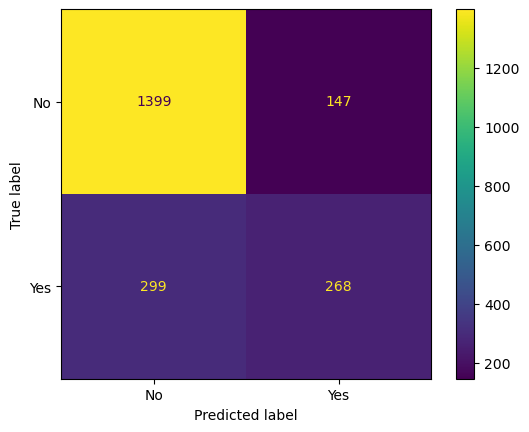

In [10]:
plot_conf_matrix(y_test, y_pred_test)

## Managing imbalance

## Upsampling

In [11]:
counts = churnData['Churn'].value_counts()
counts

No     5174
Yes    1869
Name: Churn, dtype: int64

In [12]:
yes = churnData[churnData['Churn']=='Yes'].sample(counts[0], replace=True)
no = churnData[churnData['Churn']=='No']
data = pd.concat([yes,no], axis=0)
data = data.sample(frac=1)

In [13]:
data['Churn'].value_counts()

Yes    5174
No     5174
Name: Churn, dtype: int64

In [14]:
X = data[['tenure', 'SeniorCitizen','MonthlyCharges', 'TotalCharges']]
y = pd.DataFrame(data['Churn'])
transformer = StandardScaler().fit(X)
scaled_x = transformer.transform(X)
X_train, X_test, y_train, y_test = train_test_split(scaled_x, y, test_size=0.33)
classification = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred_test = classification.predict(X_test)

<b> Accuracy

In [15]:
classification.score(X_test, y_test)

0.726207906295754

In [16]:
performance_log(y_test, y_pred_test)

,Error_metric,Test
0,Accuracy,0.726208
1,Precision,0.727899
2,Recall,0.733372


Confusion matrix for the test set
[[1212  474]
 [ 461 1268]]


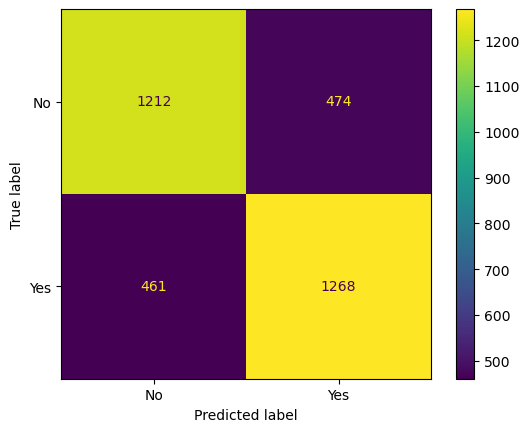

In [17]:
plot_conf_matrix(y_test, y_pred_test)

## Downsampling

In [18]:
yes = churnData[churnData['Churn']=='Yes']
no = churnData[churnData['Churn']=='No']
no = no.sample(len(yes))
data = pd.concat([yes,no], axis=0)
data = data.sample(frac=1)
data['Churn'].value_counts()

Yes    1869
No     1869
Name: Churn, dtype: int64

In [19]:
X = data[['tenure', 'SeniorCitizen','MonthlyCharges', 'TotalCharges']]
y = pd.DataFrame(data['Churn'])
transformer = StandardScaler().fit(X)
scaled_x = transformer.transform(X)
X_train, X_test, y_train, y_test = train_test_split(scaled_x, y, test_size=0.33)
classification = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(X_train, y_train)
y_pred_test = classification.predict(X_test)

<b> Accuracy

In [20]:
classification.score(X_test, y_test)

0.7431118314424635

In [21]:
performance_log(y_test, y_pred_test)

,Error_metric,Test
0,Accuracy,0.743112
1,Precision,0.747107
2,Recall,0.733766


## Fit a Decision Tree Classifier on the training data.

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

,Error_metric,Train,Test
0,Accuracy,0.752294,0.696078
1,Precision,0.721180,0.675159
2,Recall,0.822630,0.755793


Confusion matrix for the train set
[[ 892  232]
 [ 416 1076]]


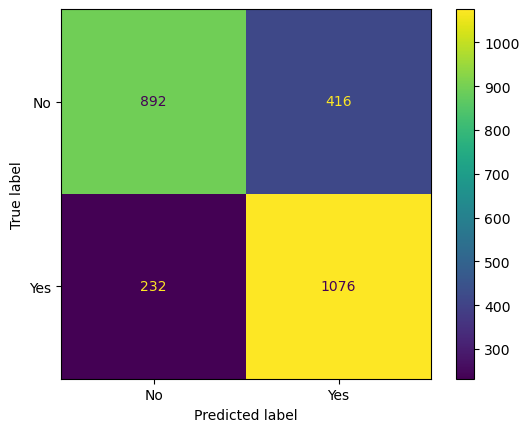



Confusion matrix for the test set
[[357 137]
 [204 424]]


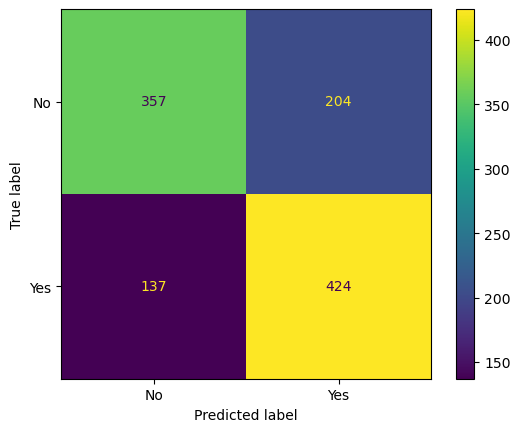

In [27]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=11)

# Bear in mind that sklearn uses a different function for decission trees used for 
# classification ( to predict a categorical feature ): DecisionTreeClassifier() 
dt = DecisionTreeClassifier(max_depth=3)

dt.fit(X_train, y_train)

y_pred_train_dt = dt.predict(X_train)
y_pred_test_dt = dt.predict(X_test)

#prob_pred_test_dt = model.predict_proba(X_test)

performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt,pos_label="Yes"),
                                         recall_score(y_train, y_pred_train_dt, pos_label="Yes")],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt,pos_label="Yes"),
                                        recall_score(y_test, y_pred_test_dt, pos_label="Yes")]}) #churn yes)

display(performance_df)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(dt,X_train,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(dt,X_test,y_test, values_format = 'd')
plt.show()

##accuray 0.75 %

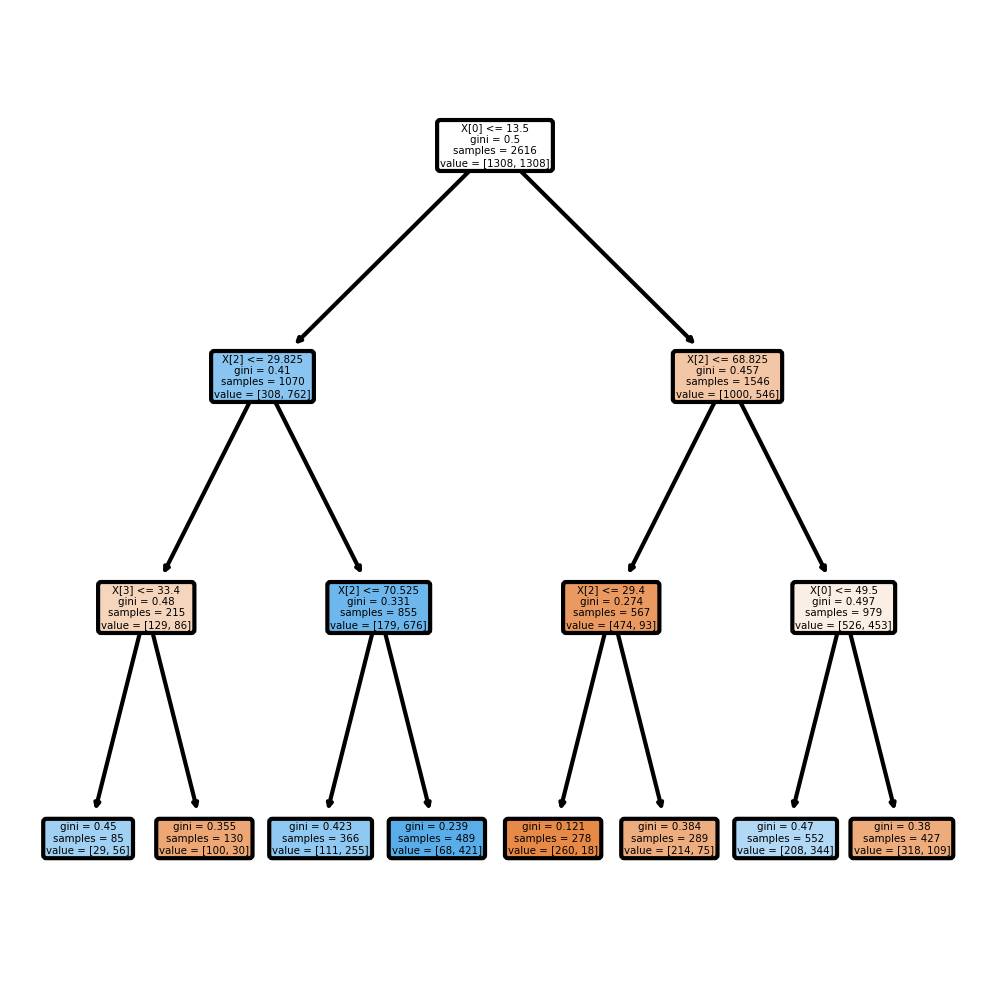

In [30]:
#customer churn -> Yes 

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)

plot_tree(dt,filled = True, rounded=True)
plt.show()

#gini ist das Kriterium, das der Entscheidungsbaum beim Aufteilen der verfügbaren Features im Datensatz
#(Qualität der Aufteilung) berücksichtigen muss, um eine Entscheidung zu treffen.

In [43]:
X_train #x0-> tenure X2:monthly charges #x3totalcharges

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
746,72,1,114.95,8196.40
5206,37,0,65.60,2313.80
5704,19,0,86.85,1564.40
3414,47,0,41.90,1875.25
2945,9,0,75.60,661.55
...,...,...,...,...
354,21,1,41.90,840.10
4830,54,0,74.55,4191.45
5010,61,0,88.65,5321.25
4350,33,0,44.55,1462.60
